# Heart Disease Prediction Using Machine Learning Algorithms

## Import Libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import *

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

print("successful import ;)")

successful import ;)


## Read Dataset and preprocess the data

In [28]:
heartData=pd.read_csv("./dataset/heart_data_set.csv");

In [29]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [30]:
heartData.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Total missing percent of data

In [31]:
missing_data= heartData.isnull().sum()
total_percentage = (missing_data.sum()/heartData.shape[0]) * 100
print(f'Total percentage of missing data is {round(total_percentage,2)}%')
duplicate=heartData[heartData.duplicated()]
print("Duplicate rows:")
duplicate
#drop duplicate rows
heartData=heartData.drop_duplicates()

Total percentage of missing data is 0.0%
Duplicate rows:


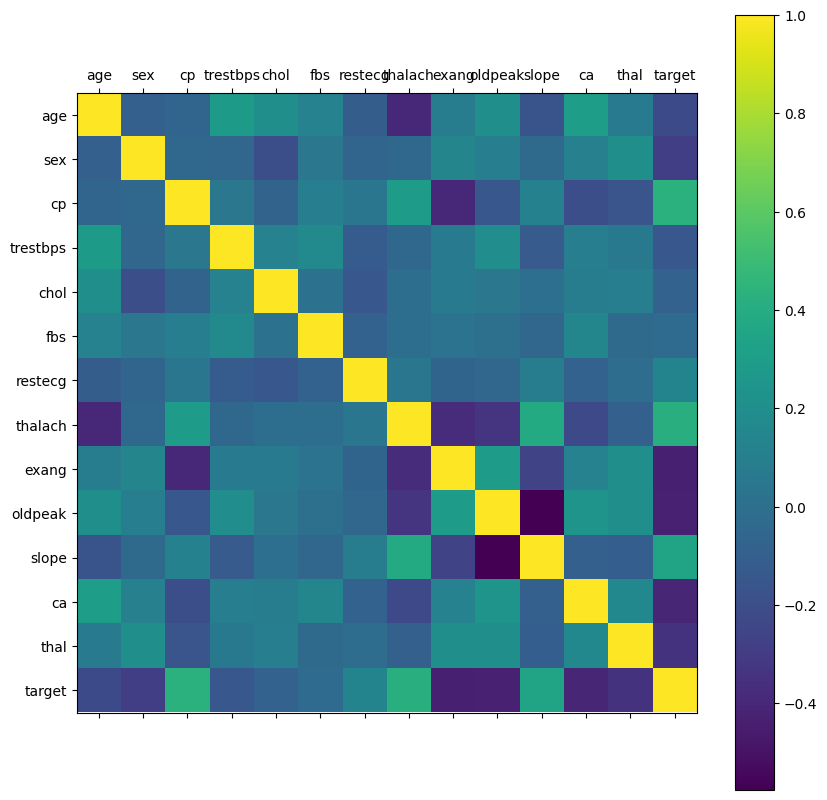

In [32]:
rcParams['figure.figsize'] = 10,10
plt.matshow(heartData.corr())
plt.yticks(np.arange(heartData.shape[1]), heartData.columns)
plt.xticks(np.arange(heartData.shape[1]), heartData.columns)
plt.colorbar()

In [33]:
corr = heartData.corr()

corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


### Count of each Target Class

Text(0.5, 1.0, 'Count of each Target Class')

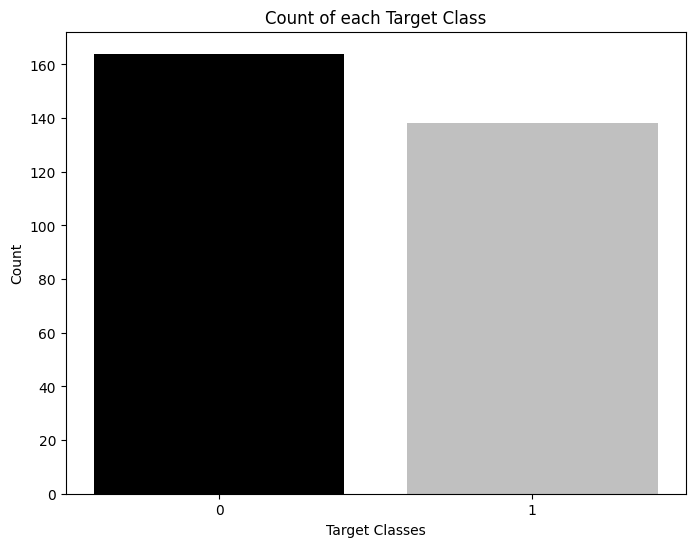

In [34]:
rcParams['figure.figsize'] = 8,6
plt.bar(heartData['target'].unique(), heartData['target'].value_counts(), color = ['black', 'silver'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

## Divide data into training and testing classes

In [35]:
X = heartData.drop(['target'], axis = 1)
y = heartData['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
print("XTrain->",X_train.shape[0],"XTest->",X_test.shape[0], "YTrain->",y_train.shape[0], "XTrain->",y_test.shape[0])

XTrain-> 211 XTest-> 91 YTrain-> 211 XTrain-> 91


# Model Building

# KNN Algorithm

0.6373626373626373
              precision    recall  f1-score   support

           0       0.62      0.49      0.55        41
           1       0.64      0.76      0.70        50

    accuracy                           0.64        91
   macro avg       0.63      0.62      0.62        91
weighted avg       0.64      0.64      0.63        91



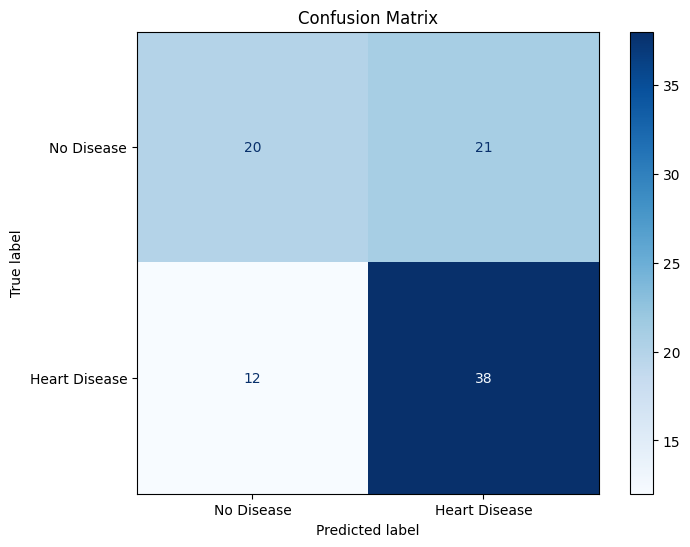

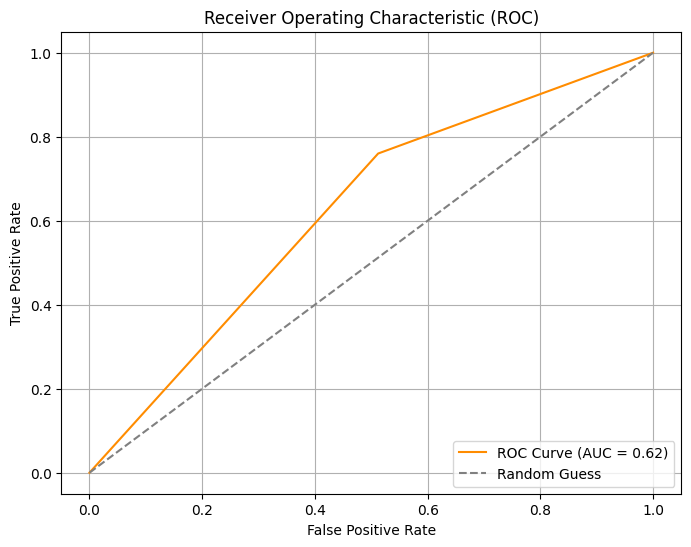

In [11]:
knn_scores = []
for k in range(2,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train.values, y_train.values)
    knn_score=round(knn_classifier.score(X_test.values, y_test.values),2)
    knn_scores.append(knn_score)


knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, y_train)
knn_score=knn_classifier.predict(X_test)
print(accuracy_score(y_test,knn_score))
print(classification_report(y_test,knn_score))

#Confusion matrix
cm = confusion_matrix(y_test, knn_score)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Heart Disease'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#Calculate ROC AUC:
fpr, tpr, thresholds = roc_curve(y_test, knn_score)
roc_auc = auc(fpr, tpr)

#ROC curve plot:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## KNN Plot

Text(0.5, 1.0, 'KNN Scores for different K neighbouras')

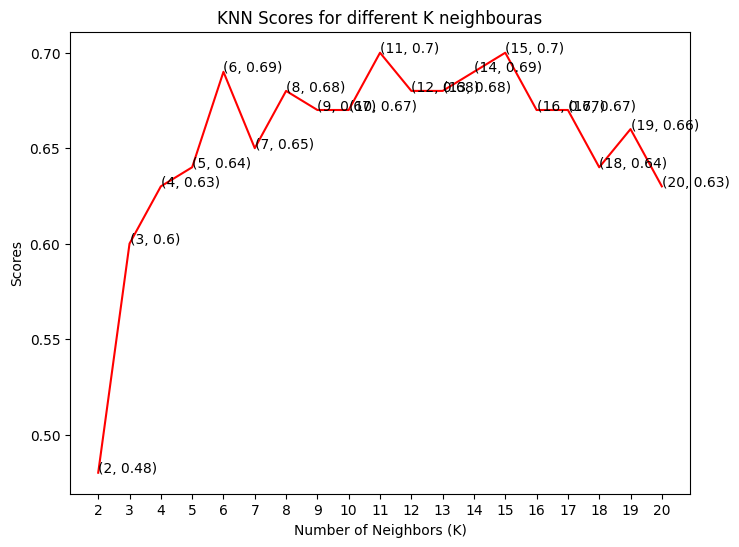

In [12]:
#KNN plot
plt.plot([k for k in range(2, 21)], knn_scores, color = 'red')
for i in range(2,21):
    plt.text(i, knn_scores[i-2], (i, knn_scores[i-2]))
plt.xticks([i for i in range(2, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('KNN Scores for different K neighbouras')

In [13]:
print(knn_scores)
print(max(knn_scores))

[0.48, 0.6, 0.63, 0.64, 0.69, 0.65, 0.68, 0.67, 0.67, 0.7, 0.68, 0.68, 0.69, 0.7, 0.67, 0.67, 0.64, 0.66, 0.63]
0.7


In [14]:
knn_classifier = KNeighborsClassifier(n_neighbors = 11)
knn_classifier.fit(X_train.values, y_train.values)
check_data_by_sudhansu = np.array([[52,1,0,125,212,0,1,168,0,1,2,2,3]])
#check_data_by_sudhansu = np.array([[71,0,0,112,149,0,1,100,0,1.6,1,0,2]]) o/p=1
prediction_result = knn_classifier.predict(check_data_by_sudhansu)
print("Prediction: {}".format(prediction_result))

Prediction: [1]


# Support Vector Machine

0.7912087912087912
              precision    recall  f1-score   support

           0       0.87      0.63      0.73        41
           1       0.75      0.92      0.83        50

    accuracy                           0.79        91
   macro avg       0.81      0.78      0.78        91
weighted avg       0.80      0.79      0.79        91



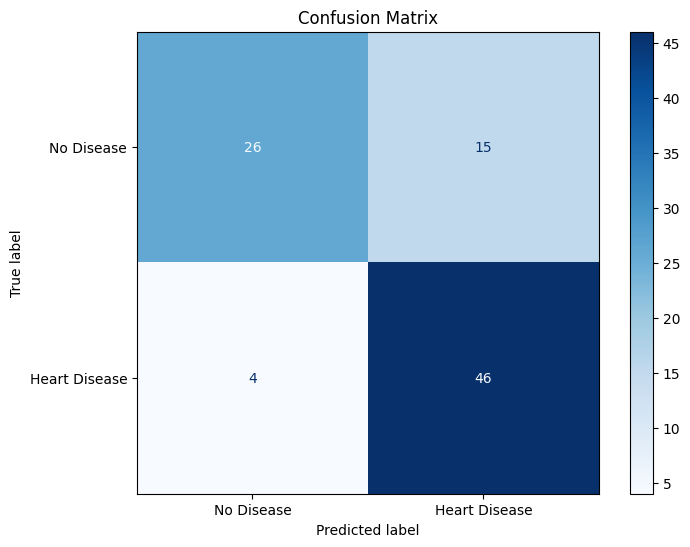

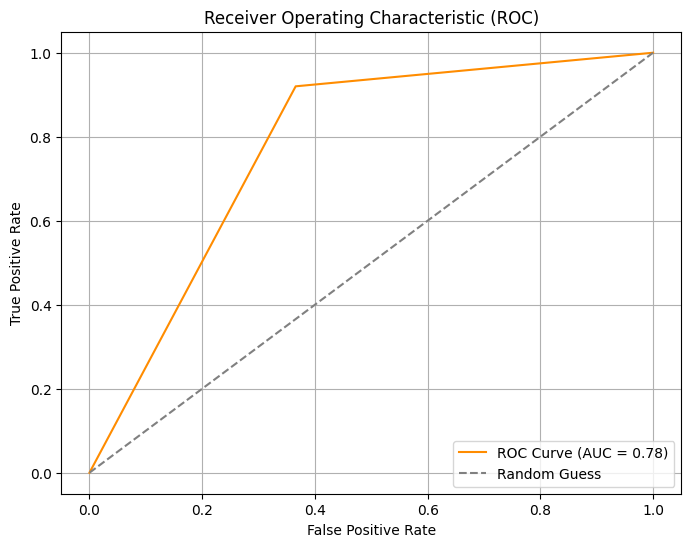

In [15]:
from sklearn.metrics import accuracy_score

svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train.values, y_train.values)
    svc_scores.append(round(svc_classifier.score(X_test.values, y_test.values),2))

svc_classifier = SVC(kernel = kernels[0])
svc_classifier.fit(X_train.values, y_train.values)
svc_prediction_result=svc_classifier.predict(X_test.values)
#print(svc_prediction_result)
print(accuracy_score(y_test.values,svc_prediction_result))
print(classification_report(y_test, svc_prediction_result))

#Confusion matrix
cm = confusion_matrix(y_test, svc_prediction_result)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Heart Disease'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#Calculate ROC AUC:
fpr, tpr, thresholds = roc_curve(y_test, svc_prediction_result)
roc_auc = auc(fpr, tpr)

#ROC curve plot:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'SVM scores Activation function wise...')

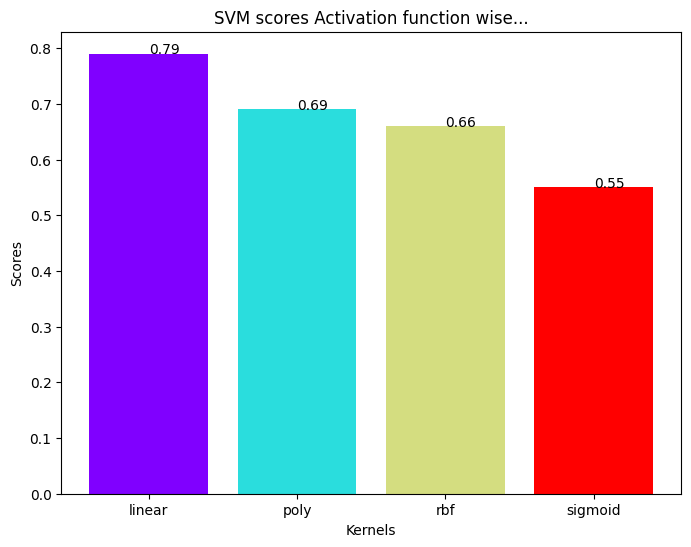

In [16]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('SVM scores Activation function wise...')

# Decision Tree

In [17]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train.values, y_train.values)
    dt_scores.append(round(dt_classifier.score(X_test.values, y_test.values),2))
print("Done")

Done


In [18]:
print(dt_scores)

[0.66, 0.7, 0.74, 0.71, 0.71, 0.68, 0.7, 0.73, 0.7, 0.71, 0.74, 0.74, 0.74]


              precision    recall  f1-score   support

           0       0.73      0.66      0.69        41
           1       0.74      0.80      0.77        50

    accuracy                           0.74        91
   macro avg       0.74      0.73      0.73        91
weighted avg       0.74      0.74      0.73        91



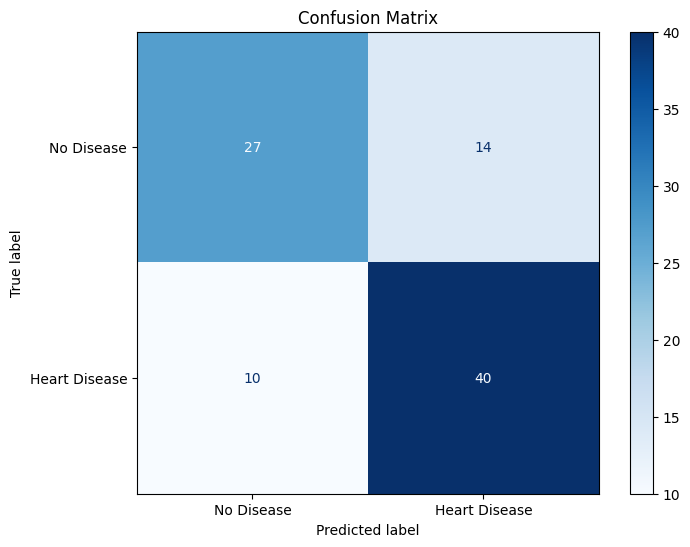

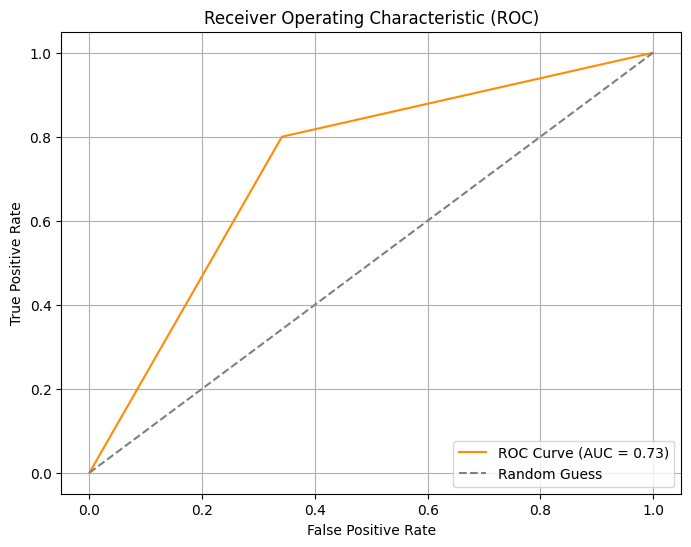

In [19]:
dt_classifier = DecisionTreeClassifier(max_features = 13, random_state = 0)
dt_classifier.fit(X_train.values, y_train.values)
y_pred = dt_classifier.predict(X_test.values)
print(classification_report(y_test, y_pred))

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Heart Disease'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#Calculate ROC AUC:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

#ROC curve plot:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

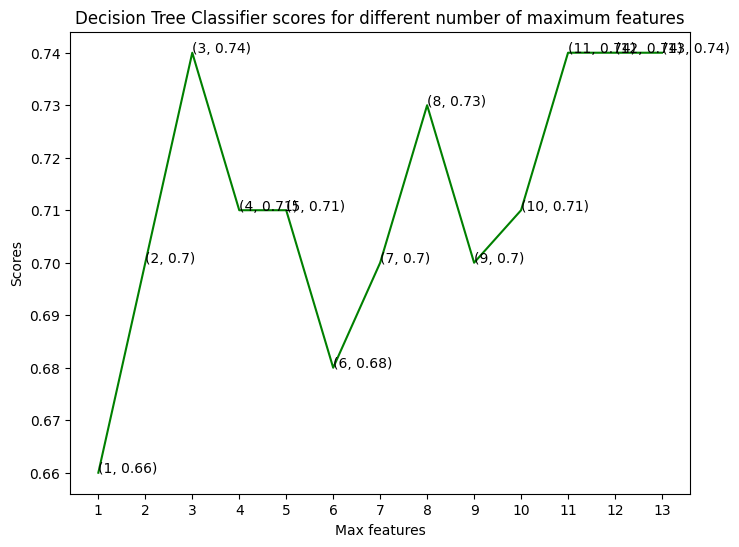

In [20]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

# Random Forest

In [21]:
rf_scores = []
estimators = [10, 20,100, 200, 500]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train.values, y_train.values)
    rf_scores.append(round(rf_classifier.score(X_test.values, y_test.values),2))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

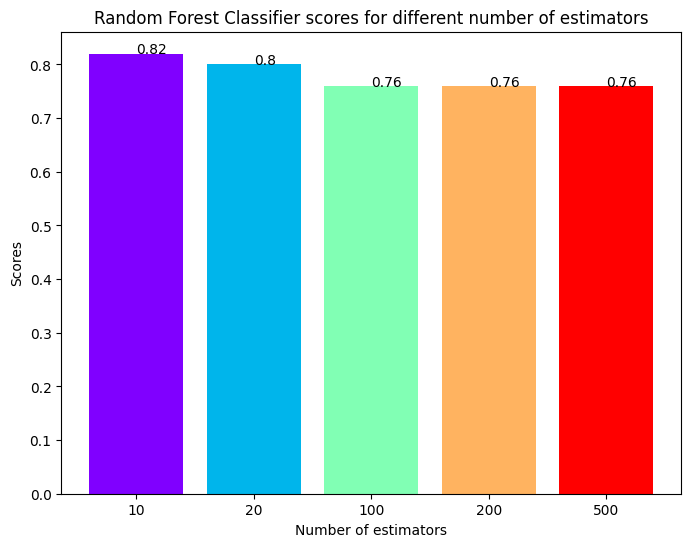

In [22]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

0.7582417582417582
              precision    recall  f1-score   support

           0       0.77      0.66      0.71        41
           1       0.75      0.84      0.79        50

    accuracy                           0.76        91
   macro avg       0.76      0.75      0.75        91
weighted avg       0.76      0.76      0.76        91



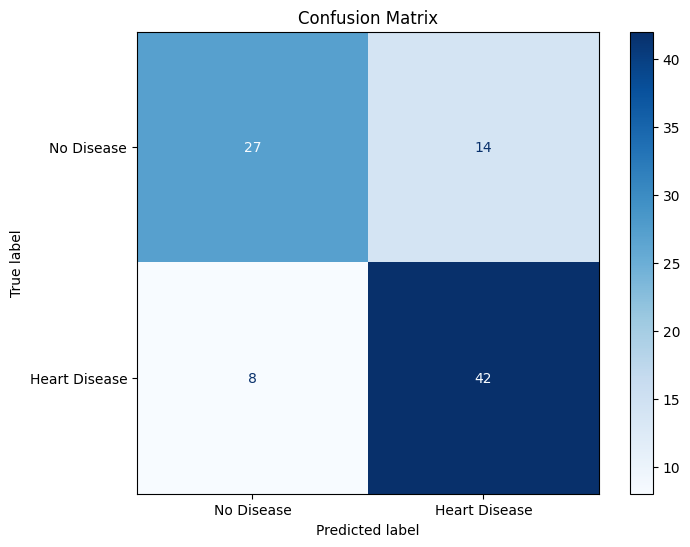

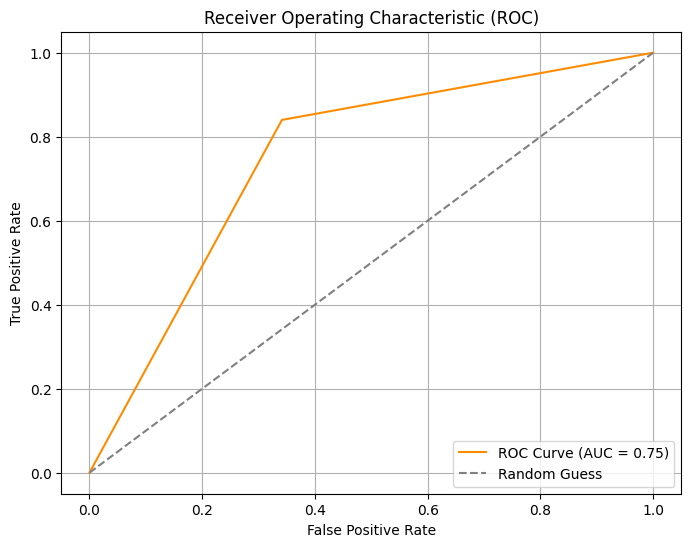

In [23]:
rf_model = RandomForestClassifier(n_estimators = 10, random_state = 0)
rf_model.fit(X_train.values, y_train.values)
rf_model_result=rf_classifier.predict(X_test.values)
print(accuracy_score(y_test,rf_model_result))
print(classification_report(y_test.values,rf_model_result))

#Confusion matrix
cm = confusion_matrix(y_test, rf_model_result)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Heart Disease'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#Calculate ROC AUC:
fpr, tpr, thresholds = roc_curve(y_test, rf_model_result)
roc_auc = auc(fpr, tpr)

#ROC curve plot:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Logistic Regression

0.8131868131868132
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        41
           1       0.79      0.90      0.84        50

    accuracy                           0.81        91
   macro avg       0.82      0.80      0.81        91
weighted avg       0.82      0.81      0.81        91



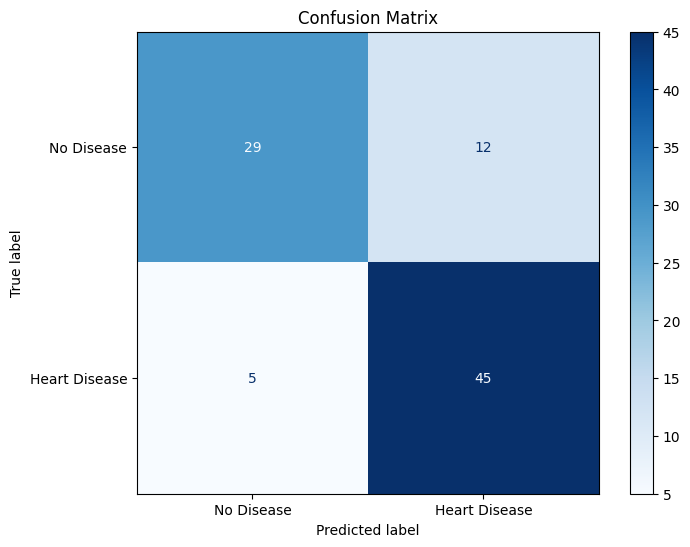

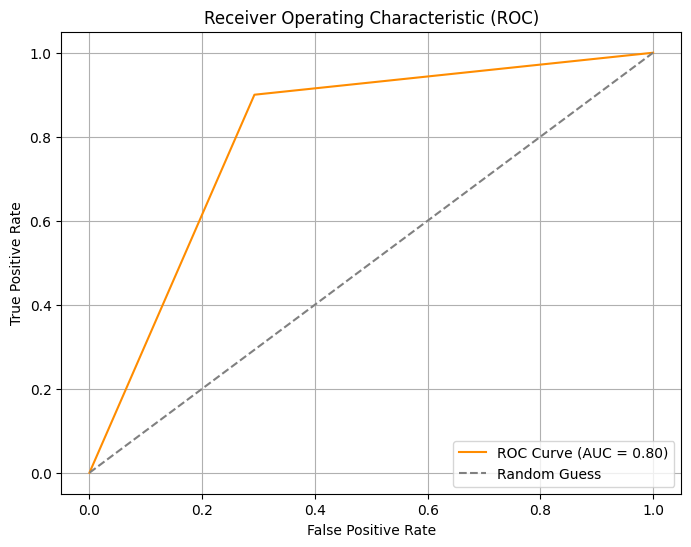

In [24]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train.values, y_train.values)
logistic_model_prediction=logistic_model.predict(X_test.values)
print(accuracy_score(y_test.values,logistic_model_prediction))
print(classification_report(y_test.values,logistic_model_prediction))

#Confusion matrix
cm = confusion_matrix(y_test, logistic_model_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Heart Disease'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#Calculate ROC AUC:
fpr, tpr, thresholds = roc_curve(y_test, logistic_model_prediction)
roc_auc = auc(fpr, tpr)

#ROC curve plot:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Statistical Analysis (K-Fold Cross-Validation)

In [53]:
# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

# Define scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Run cross-validation for each model
for name, model in models.items():
    # Add StandardScaler to pipeline (important for KNN and SVM)
    pipeline = make_pipeline(StandardScaler(), model)
    
    results = cross_validate(pipeline, X, y, cv=5, scoring=scoring)
    
    print(f"\n{name}")
    print("-" * len(name))
    for metric in scoring:
        mean_score = results[f'test_{metric}'].mean()
        std_score = results[f'test_{metric}'].std()
        print(f"{metric.capitalize():<10}: {mean_score:.3f} ± {std_score:.3f}")


Logistic Regression
-------------------
Accuracy  : 0.821 ± 0.061
Precision : 0.811 ± 0.056
Recall    : 0.879 ± 0.060
F1        : 0.843 ± 0.053
Roc_auc   : 0.893 ± 0.049

Random Forest
-------------
Accuracy  : 0.828 ± 0.040
Precision : 0.829 ± 0.028
Recall    : 0.860 ± 0.056
F1        : 0.844 ± 0.038
Roc_auc   : 0.908 ± 0.044

SVM
---
Accuracy  : 0.818 ± 0.038
Precision : 0.816 ± 0.058
Recall    : 0.866 ± 0.037
F1        : 0.839 ± 0.030
Roc_auc   : 0.895 ± 0.051

Decision Tree
-------------
Accuracy  : 0.768 ± 0.043
Precision : 0.792 ± 0.043
Recall    : 0.781 ± 0.039
F1        : 0.786 ± 0.037
Roc_auc   : 0.767 ± 0.045

KNN
---
Accuracy  : 0.811 ± 0.055
Precision : 0.810 ± 0.061
Recall    : 0.860 ± 0.062
F1        : 0.832 ± 0.046
Roc_auc   : 0.880 ± 0.049


# Save Trained Models

In [54]:
import pickle
all_models=[rf_model,logistic_model,dt_classifier,svc_classifier,knn_classifier]
#pickle.dump(logistic_model,open("models.pkl","wb"))
#pickle.dump(rf_classifier,open("models.pkl","wb"))
with open("models.pkl", 'wb') as files:
    pickle.dump(all_models, files)
print("Done")

Done


In [55]:
open_file = open("models.pkl", "rb")
loaded_list = pickle.load(open_file)
print(loaded_list)
open_file.close()
print("Done")

[RandomForestClassifier(n_estimators=10, random_state=0), LogisticRegression(), DecisionTreeClassifier(max_features=13, random_state=0), SVC(kernel='linear'), KNeighborsClassifier(n_neighbors=11)]
Done
